In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import "session_states.json" as a dataframe
df = pd.read_json('session_states.json')

# Reorder columns to this order: ['session_id], 'timestamp', 'session_state', 'group', 'matrix', 'risks_selected_s1', 'risks_selected_s2', 'risks_selected_s3', 'mitigations_selected_s1', 'mitigations_selected_s2', 'mitigations_selected_s3', 'before', 'after', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'role', 'sector', 'experience']
df = df[['session_id', 'timestamp', 'session_state', 'group', 'matrix', 'risks_selected_s1', 'risks_selected_s2', 'risks_selected_s3', 'mitigations_selected_s1', 'mitigations_selected_s2', 'mitigations_selected_s3', 'before', 'after', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'role', 'sector', 'experience']]
df.head()

# Create a new column called "session_duration" that is the difference between the last timestamp and the first timestamp for each session_id
df['session_duration'] = df.groupby('session_id')['timestamp'].transform(lambda x: x.max() - x.min())

# Create a new column called "session_duration_seconds" that is the session_duration column converted to seconds
df['session_duration_seconds'] = df['session_duration'].dt.total_seconds()

# add a column to the dataframe indicating the count of rows that have the same value for the session_id
df['session_count'] = df.groupby('session_id')['session_id'].transform('count')

# add a column to the dataframe indicating the the earliest timestamp of the other rows that share the same session_id
df['session_start'] = df.groupby('session_id')['timestamp'].transform('min')

In [3]:
# Conference Programme for October 4, 2023
programme = [
    {'timestamp': '2023-10-04 08:30:00', 'name': 'Registration', 'duration_minutes': 30},
    {'timestamp': '2023-10-04 09:00:00', 'name': 'Keynote', 'duration_minutes': 45},
    {'timestamp': '2023-10-04 09:45:00', 'name': 'Introduction', 'duration_minutes': 30},
    {'timestamp': '2023-10-04 10:15:00', 'name': 'Part I', 'duration_minutes': 30},
    {'timestamp': '2023-10-04 10:45:00', 'name': 'Break', 'duration_minutes': 30},
    {'timestamp': '2023-10-04 11:15:00', 'name': 'Part II', 'duration_minutes': 60},
    {'timestamp': '2023-10-04 12:15:00', 'name': 'Lunch', 'duration_minutes': 60},
    {'timestamp': '2023-10-04 13:15:00', 'name': 'Part III', 'duration_minutes': 60},
    {'timestamp': '2023-10-04 14:15:00', 'name': 'Presentations', 'duration_minutes': 45},
]
programme_df = pd.DataFrame(programme)
programme_df['timestamp'] = pd.to_datetime(programme_df['timestamp'])

In [4]:
# how many rows for each value of group?
df['group'].value_counts()

group
7         831
3         633
6         497
1         490
Select    406
4         383
5         202
2         193
Name: count, dtype: int64

In [5]:
# How many unique values of session_id are there for each value of group?
df.groupby('group')['session_id'].nunique()

group
1          52
2          14
3          51
4          21
5          26
6          43
7         188
Select    237
Name: session_id, dtype: int64

In [6]:
# Take away rows where the group is "Select"
df = df[df['group'] != 'Select']
df['group'].value_counts()

group
7    831
3    633
6    497
1    490
4    383
5    202
2    193
Name: count, dtype: int64

In [7]:
# Take away rows where the timestamp is before the conference programme starts
df = df[df['timestamp'] >= programme_df['timestamp'].min()]
df['group'].value_counts()

group
7    826
6    477
3    428
1    360
4    332
5    168
2    130
Name: count, dtype: int64

In [8]:
# Take away rows where the timestamp is after the conference programme ends (when the Presentations start)
df = df[df['timestamp'] <= programme_df['timestamp'].max()]
df['group'].value_counts()

group
7    821
6    449
3    349
4    331
1    323
5    168
2     98
Name: count, dtype: int64

In [9]:
# display all the df rows with group == 2
df[df['group'] == '2']

,session_id,timestamp,session_state,group,matrix,risks_selected_s1,risks_selected_s2,risks_selected_s3,mitigations_selected_s1,mitigations_selected_s2,...,q6,q7,q8,role,sector,experience,session_duration,session_duration_seconds,session_count,session_start
92,0a04a57d-cbb2-4232-aebf-c80c7a3fd177,2023-10-04 12:58:06,NaN,2,Risk DSM,[],[],[],[],[],...,NaN,NaN,NaN,[],[],NaN,0 days 00:06:47,407.0,2,2023-10-04 12:58:06
93,0a04a57d-cbb2-4232-aebf-c80c7a3fd177,2023-10-04 13:04:53,NaN,2,Risk DSM,[],[],[],[],[],...,2.5,2.5,2.5,None,None,NaN,0 days 00:06:47,407.0,2,2023-10-04 12:58:06
470,199b2ac5-f7df-4314-9bba-d4a258df6daf,2023-10-04 08:42:20,NaN,2,Interfaces DSM,[],[],[],[],[],...,NaN,NaN,NaN,[],[],NaN,0 days 00:30:02,1802.0,8,2023-10-04 08:12:18
557,217b73a3-f693-4eee-88cd-88472f322475,2023-10-04 09:55:54,NaN,2,Interfaces DSM,[],[],[],[],[],...,NaN,NaN,NaN,[],[],NaN,0 days 02:19:50,8390.0,38,2023-10-04 09:55:49
558,217b73a3-f693-4eee-88cd-88472f322475,2023-10-04 09:55:56,NaN,2,Interfaces DSM,[],[],[],[],[],...,NaN,NaN,NaN,[],[],NaN,0 days 02:19:50,8390.0,38,2023-10-04 09:55:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,4d7fb9e5-0687-4b9c-80cb-2702df26ca2e,2023-10-04 09:51:57,NaN,2,Risk DSM,"[R02, R10, R09]","[R09, R10, R23]","[R23, R30, R29]","[M02, M24]",[],...,NaN,NaN,NaN,[],[],NaN,0 days 01:26:15,5175.0,45,2023-10-04 08:27:37
1253,4d7fb9e5-0687-4b9c-80cb-2702df26ca2e,2023-10-04 09:53:36,NaN,2,Risk DSM,"[R02, R10, R09]","[R09, R10, R23]","[R23, R30, R29]","[M02, M24]",[M02],...,NaN,NaN,NaN,[],[],NaN,0 days 01:26:15,5175.0,45,2023-10-04 08:27:37
1254,4d7fb9e5-0687-4b9c-80cb-2702df26ca2e,2023-10-04 09:53:38,NaN,2,Risk DSM,"[R02, R10, R09]","[R09, R10, R23]","[R23, R30, R29]","[M02, M24]","[M02, M04]",...,NaN,NaN,NaN,[],[],NaN,0 days 01:26:15,5175.0,45,2023-10-04 08:27:37
1255,4d7fb9e5-0687-4b9c-80cb-2702df26ca2e,2023-10-04 09:53:50,NaN,2,Risk DSM,"[R02, R10, R09]","[R09, R10, R23]","[R23, R30, R29]","[M02, M24]",[M02],...,NaN,NaN,NaN,[],[],NaN,0 days 01:26:15,5175.0,45,2023-10-04 08:27:37


In [10]:
# how many rows for each value of group?
df['group'].value_counts()

group
7    821
6    449
3    349
4    331
1    323
5    168
2     98
Name: count, dtype: int64

In [11]:
# How many unique values of session_id are there for each value of group?
df.groupby('group')['session_id'].nunique()

group
1     33
2      5
3     18
4     12
5     19
6     30
7    183
Name: session_id, dtype: int64

In [14]:
# new dataframe df_groups that has data aggregated per gorup, as how many rows for each value of group in df?
df_groups = df.groupby('group').agg({'session_id': 'count'})
# add column to df_groups with How many unique values of session_id are there for each value of group in df?
df_groups['unique_session_ids'] = df.groupby('group')['session_id'].nunique()
df_groups

,session_id,unique_session_ids
group,,
1,323,33
2,98,5
3,349,18
4,331,12
5,168,19
6,449,30
7,821,183


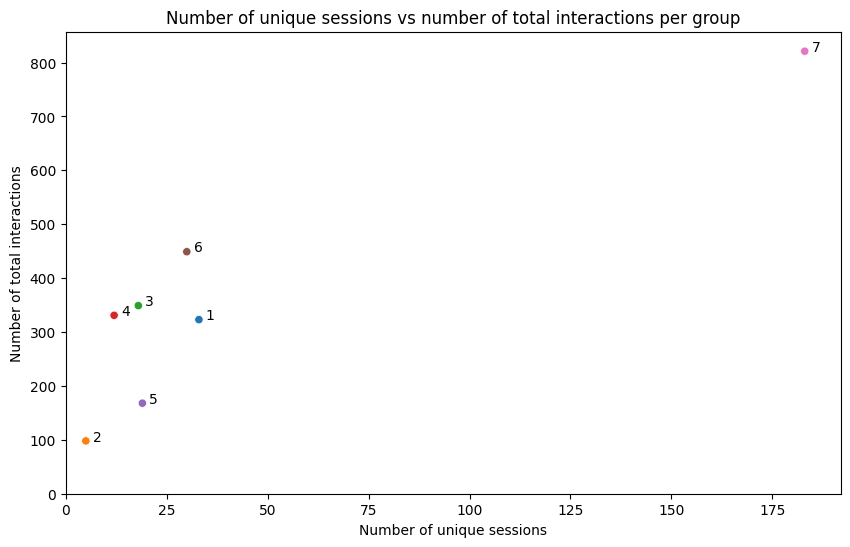

In [27]:
# scatter plot of unique_session_ids vs session_id count with each group as a different color
# legend in bottom right
# x axis label: 'Number of unique session ids'
# y axis label: 'Number of rows'
# title: 'Number of rows per group'
# save as 'rows_per_group.png'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unique_session_ids', y='session_id', hue=df_groups.index, data=df_groups)
# label each point with its group
for i, group in enumerate(df_groups.index):
    plt.annotate(group, 
                (df_groups['unique_session_ids'][i], df_groups['session_id'][i]),
                # shift the label slightly to the right
                textcoords="offset points",
                xytext=(5,0),
                ha='left'
                )
# start both axes at 0
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('Number of unique sessions')
plt.ylabel('Number of total interactions')
plt.title('Number of unique sessions vs number of total interactions per group')
# remove legend
plt.legend().remove()
plt.savefig('rows_per_group.png', dpi=300)
plt.show()

In [30]:
!pip install pygwalker --user

  Obtaining dependency information for pygwalker from https://files.pythonhosted.org/packages/6b/b1/269a0740259b833e8e5d7cc03569ba2de871e8eab5f3651583adbe5420fa/pygwalker-0.3.9-py3-none-any.whl.metadata
  Using cached pygwalker-0.3.9-py3-none-any.whl.metadata (20 kB)
  Obtaining dependency information for arrow from https://files.pythonhosted.org/packages/f8/ed/e97229a566617f2ae958a6b13e7cc0f585470eac730a73e9e82c32a3cdd2/arrow-1.3.0-py3-none-any.whl.metadata
  Using cached arrow-1.3.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Obtaining dependency information for gw-dsl-parser==0.1.6a6 from https://files.pythonhosted.org/packages/f5/ea/4ddb5a698a05b86479ad9f0230ea219b6918dd9df0e27cfc67214b0f729d/gw_dsl_parser-0.1.6a6-py3-none-any.whl.metadata
  Using cached gw_dsl_parser-0.1.6a6-py3-none-any.whl.metadata (1.2 kB)
  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d8


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pygwalker as pyg

In [32]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

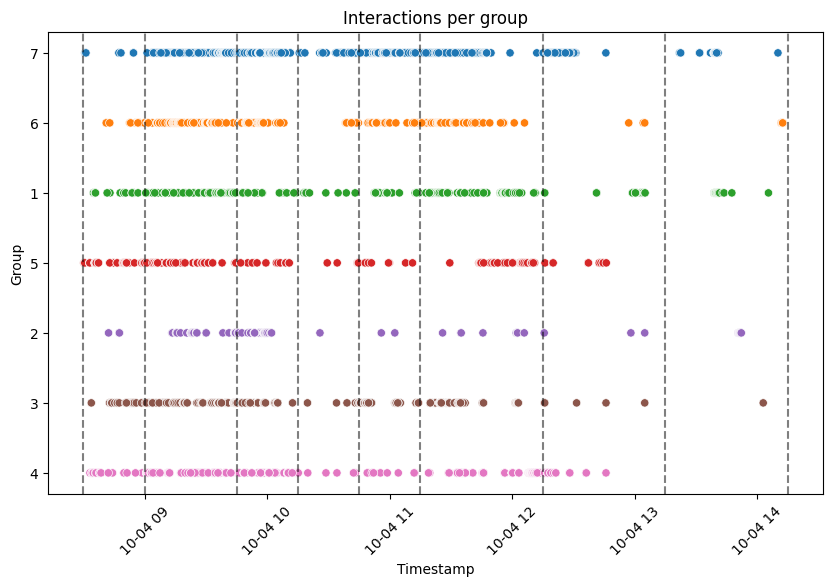

In [36]:
# scatter plot of df with timestamp in the x and group in the y, color by group
# x axis label: 'Timestamp'
# y axis label: 'Group'
# title: 'Interactions per group'
# save as 'interactions_per_group.png'
plt.figure(figsize=(10, 6))
# y axis ordered from 1 to 7
sns.scatterplot(x='timestamp', y='group', hue='group', data=df)
# rotate the x axis labels
plt.xticks(rotation=45)
# add vertical lines for the programme start and end times
for i, row in programme_df.iterrows():
    plt.axvline(row['timestamp'], color='black', linestyle='--', alpha=0.5)
# add a legend for the vertical lines
plt.plot([], [], color='black', linestyle='--', label='Programme')
plt.xlabel('Timestamp')
plt.ylabel('Group')
plt.title('Interactions per group')
plt.legend().remove()
plt.savefig('interactions_per_group.png', dpi=300)
plt.show()


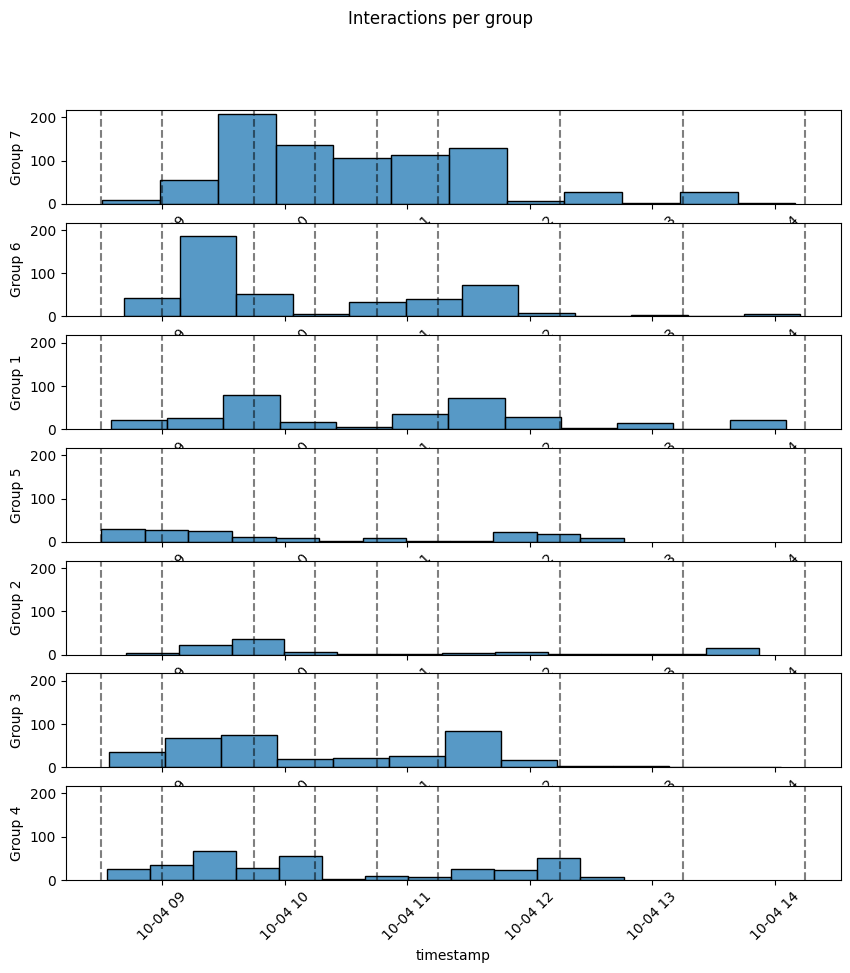

In [46]:
# one histogram per group of the timestamps, as 7 subplots in a 7x1 grid
# 5 minutes bucket sizes for all histograms
# x axis label: 'Timestamp'
# y axis label: 'Count'
# title: 'Interactions per group'
# save as 'interactions_per_group.png'
fig, axes = plt.subplots(7, 1, figsize=(10, 10), sharey=True)
for i, group in enumerate(df['group'].unique()):
    # select the rows for this group
    group_df = df[df['group'] == group]
    # plot a histogram of the timestamps
    sns.histplot(ax=axes[i], x='timestamp', data=group_df, bins=12)
    # add vertical lines for the programme start and end times
    for j, row in programme_df.iterrows():
        axes[i].axvline(row['timestamp'], color='black', linestyle='--', alpha=0.5)
    # add a legend for the vertical lines
    axes[i].plot([], [], color='black', linestyle='--', label='Programme')
    # rotate the x axis labels
    axes[i].tick_params(axis='x', rotation=45)
    # set the y axis label to the group number
    axes[i].set_ylabel('Group '+group)
plt.suptitle('Interactions per group')
plt.savefig('interactions_per_group.png', dpi=300)
plt.show()